In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.ticker import AutoMinorLocator


# Full Periodic Plot

0.3627719820611709 0.8131067421886655 1.0897460342906164


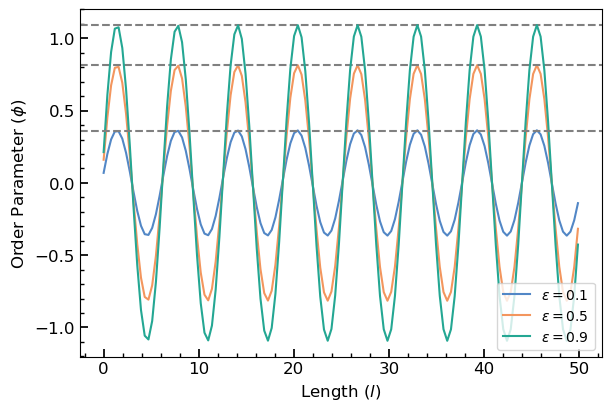

In [4]:
theo_amp = lambda eps: 2*np.sqrt(eps/3)
grid_points = 257
natural_period = 2*np.pi
one_sixteenth_period = 1/16*natural_period
total_domain_length = (grid_points-1)*one_sixteenth_period
domain_points = np .linspace(0, total_domain_length, grid_points)

eps9 = np.loadtxt('eps=0.9 periodic.txt')[2:-2,2]
eps5 = np.loadtxt('eps=0.5 periodic.txt')[2:-2,2]
eps1 = np.loadtxt('eps=0.1 periodic.txt')[2:-2,2]

phi_profiles = np.array([eps1,eps5,eps9])
eps_values = np.array([0.1,0.5,0.9])

colors = ['#5287C6','#F3965E','#24A793', '#C00A35']


amp9 = np.mean(np.array([eps9[peak] for peak in find_peaks(eps9)[0]]))
amp5 = np.mean(np.array([eps5[peak] for peak in find_peaks(eps5)[0]]))
amp1 = np.mean(np.array([eps1[peak] for peak in find_peaks(eps1)[0]]))
amps = np.array([amp9, amp5, amp1])
print(amp1, amp5, amp9)


# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(6, 4))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
for nn in range(3):
    curve = ax.plot(domain_points[:128], phi_profiles[nn][:128], label=r'$\epsilon=$'+f'{eps_values[nn]}', color=colors[nn])
    ax.axhline(amps[nn], color='#808080', linestyle='dashed')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0, labelsize='medium')
ax.legend(loc='lower right')
ax.set_xlabel(r'Length ($l$)', fontsize='large')
ax.set_ylabel(r'Order Parameter ($\phi$)', fontsize='large')


plt.savefig('Full Periodic Decompisition.jpg', dpi=1800)
plt.show()

# Steady Single Cell

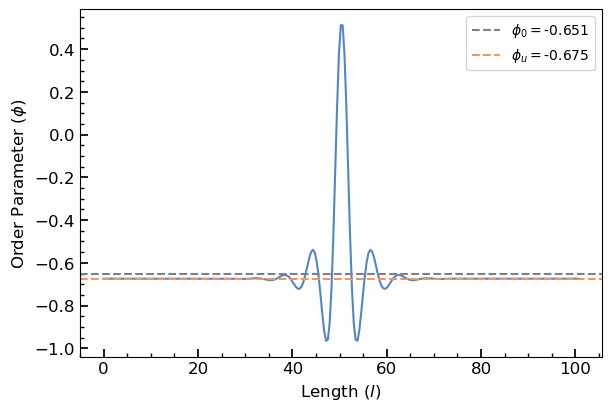

In [5]:
single257 = np.loadtxt(r'Data to Compare to Literature\Steady phi=-0.65 amp=0.1.txt')
single513 = np.loadtxt(r'Data to Compare to Literature\Steady phi=-0.66 amp=0.1.txt')


phi_uni = -0.675
phi_per = -0.243
phi_profiles = [single257, single513]
phi0_vals = [np.mean(single257).round(3), np.mean(single513).round(3)]
colors = ['#5287C6','#F3965E','#24A793']

# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(6, 4))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
for nn in range(1):
    curve = ax.plot(domain_points, phi_profiles[nn], color=colors[nn])
    ax.axhline(phi0_vals[nn], color='#808080', linestyle='dashed', label=r'$\phi_0=$'+f'{phi0_vals[nn]}')
    ax.axhline(phi_uni, color=colors[1], linestyle='dashed', label=r'$\phi_u=$'+f'{phi_uni}')
    

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0, labelsize='medium')
ax.legend(loc='upper right')
ax.set_xlabel(r'Length ($l$)', fontsize='large')
ax.set_ylabel(r'Order Parameter ($\phi$)', fontsize='large')


plt.savefig('Steady Single Cell 257.jpg', dpi=1800)
plt.show()

# Coexistence Steady States

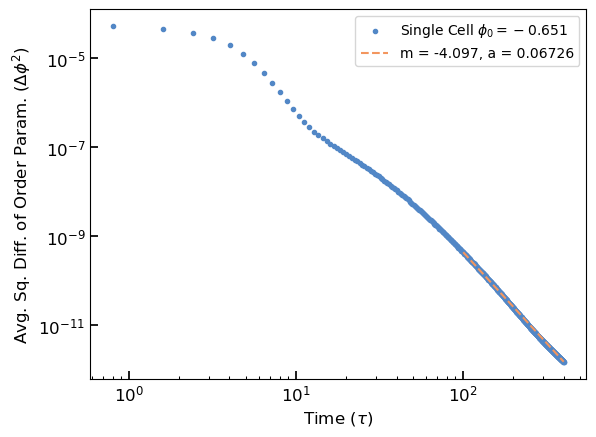

In [6]:
from scipy.optimize import curve_fit
# Power-law fitting function
def power_law_fit(x, a, b):
    return a * np.power(x, b)

snapshots_single_cell = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.65 amp=0.1.txt')
power_law_single_cell = [snapshots_single_cell[0,125:],snapshots_single_cell[1,125:]]

fig, ax = plt.subplots()
ax.scatter(snapshots_single_cell[0,1:], snapshots_single_cell[1,1:], marker='.', color='#5287C6', label=r'Single Cell $\phi_0 = -0.651$')

# Fit the power-law curve
params, covariance = curve_fit(power_law_fit, power_law_single_cell[0], power_law_single_cell[1])
# Generate fitted values
fitted_yvals = power_law_fit(power_law_single_cell[0], *params)

ax.plot(power_law_single_cell[0], fitted_yvals, '--', color=colors[1], label=f'm = {params[1].round(3)}, a = {params[0].round(5)}')


ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=0.75, length=2.5, labelsize='medium')
ax.legend()
plt.savefig(f'Single Cell Snapshots.jpg', dpi=1800)
plt.show()


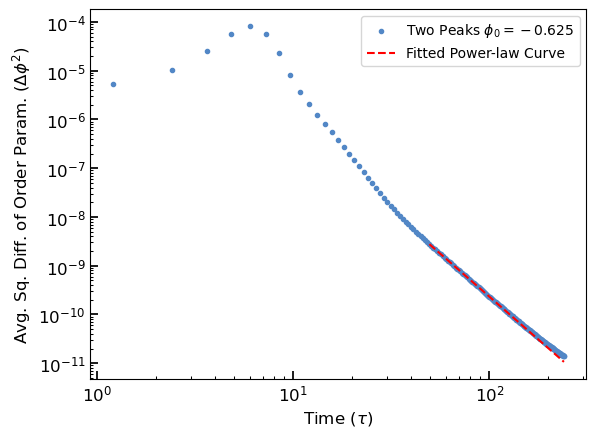

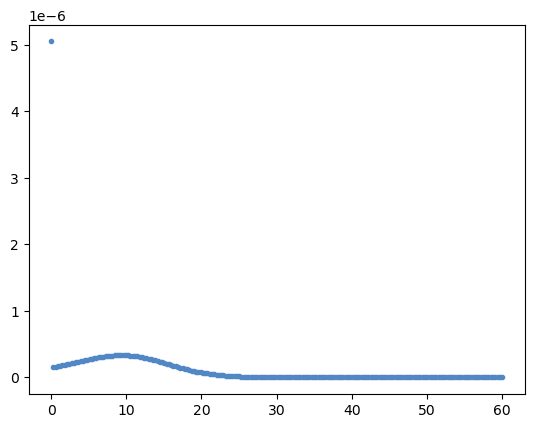

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
snapshots625_one_peak_tall_sides = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.625 amp=0.1.txt')
snapshots5_seven_peaks = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.5 amp=0.1.txt')
snapshots_full = np.loadtxt(r'Steady State Snapshots\Snapshots phi=0 amp=0.1.txt')
snapshots625_two_peaks = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.625 amp=0.05.txt')
power_law_two_peaks = [snapshots625_two_peaks[0,41:],snapshots625_two_peaks[1,41:]]

fig, ax = plt.subplots()
ax.scatter(snapshots625_two_peaks[0,1:], snapshots625_two_peaks[1,1:], marker='.', color='#5287C6', label=r'Two Peaks $\phi_0 = -0.625$')

# Fit the power-law curve
params, covariance = curve_fit(power_law_fit, power_law_two_peaks[0], power_law_two_peaks[1])
# Generate fitted values
fitted_yvals = power_law_fit(power_law_two_peaks[0], *params)

ax.plot(power_law_two_peaks[0], fitted_yvals, 'r--', label='Fitted Power-law Curve')


ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=0.75, length=2.5, labelsize='medium')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.625 amp=0.05.jpg', dpi=1800)
plt.show()





plt.scatter(snapshots_full[0,:], snapshots_full[1,:], marker='.', color='#5287C6', label=r'Full Periodic')
ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=0.75, length=2.5, labelsize='medium')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.625 amp=0.1.jpg', dpi=1800)
plt.show()



ax.scatter(snapshots625_one_peak_tall_sides[0,1:], snapshots625_one_peak_tall_sides[1,1:], marker='.', color='#5287C6', label=r'One Peak $\phi_0 = -0.625$')
ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.625 amp=0.05.jpg', dpi=1800)
plt.show()

ax.scatter(snapshots5_seven_peaks[0,:], snapshots5_seven_peaks[1,:], marker='.', color='#5287C6', label=r'Seven Peaks $\phi_0 = -0.5$')
ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(direction="in", width=1.25, labelsize='large')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.5 amp=0.1.jpg', dpi=1800)
plt.show()

# Comparing Steady States with Literature

In [8]:
from scipy.interpolate import make_interp_spline

def spline_from_lit_data(filename):
    spline = np.zeros(grid_points)
    lit_data = np.loadtxt(filename)
    lit_data[:,0] = lit_data[:,0]*total_domain_length
    lit_data[:,1] = lit_data[:,1]
    sorted_lit_data = lit_data[lit_data[:, 0].argsort()]
    spline_lit_data = make_interp_spline(sorted_lit_data[:,0], sorted_lit_data[:,1], k=1)
    return spline_lit_data(domain_points)


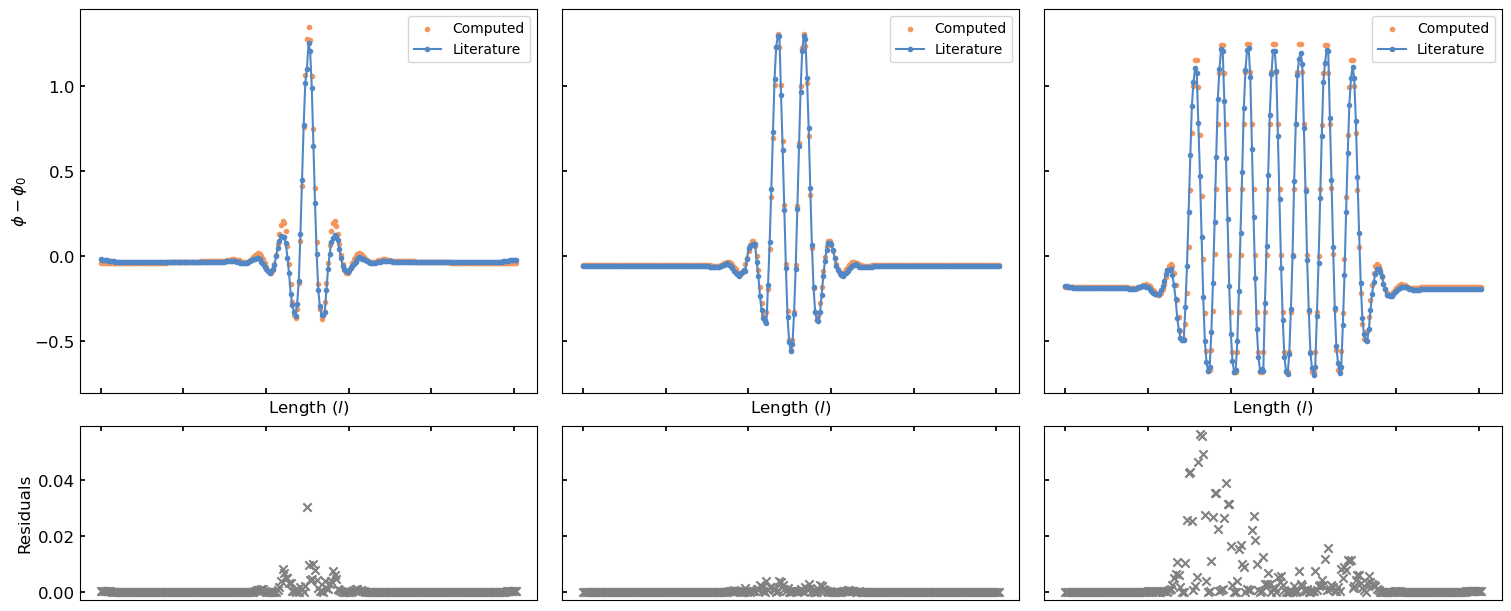

In [9]:
average_phis = [-0.625,-0.625,-0.5]

twopeaks625 = np.loadtxt(r'Data to Compare to Literature\Steady' + f' phi=-0.625 amp=0.05.txt')
twopeaks_filename = '-0.625 even 2 tall peaks'
twopeaks_lit_data = np.loadtxt(r'Literature Data\Paper ' + twopeaks_filename + ' Dataset.txt')
twopeaks_lit_data[:,0] = twopeaks_lit_data[:,0]*total_domain_length


onepeak625 = np.loadtxt(r'Data to Compare to Literature\Steady' + f' phi=-0.625 amp=0.1.txt')
onepeak_filename = '-0.625 odd 1 tall peak short sides'
onepeak_lit_data = np.loadtxt(r'Literature Data\Paper ' + onepeak_filename + ' Dataset.txt')
onepeak_lit_data[:,0] = onepeak_lit_data[:,0]*total_domain_length

sevenpeaks5 = np.loadtxt(r'Data to Compare to Literature\Steady' + f' phi=-0.5 amp=0.1.txt')
sevenpeaks_filename = '-0.5 odd 7 peaks'
sevenpeaks_lit_data = np.loadtxt(r'Literature Data\Paper ' + sevenpeaks_filename + ' Dataset.txt')
sevenpeaks_lit_data[:,0] = sevenpeaks_lit_data[:,0]*total_domain_length

twopeaks_spline = spline_from_lit_data(r'Literature Data\Paper ' + twopeaks_filename + ' Dataset.txt')
onepeak_spline = spline_from_lit_data(r'Literature Data\Paper ' + onepeak_filename + ' Dataset.txt')
sevenpeaks_spline = spline_from_lit_data(r'Literature Data\Paper ' + sevenpeaks_filename + ' Dataset.txt')


onepeak625 = np.roll(onepeak625, grid_points-1)
twopeaks625 = np.roll(twopeaks625, grid_points-1)
#sevenpeaks5 = np.roll(sevenpeaks5, grid_points-2)

mixed_states = np.array([onepeak625,twopeaks625, sevenpeaks5])

lit_data = [onepeak_spline, twopeaks_spline, sevenpeaks_spline]

fig = plt.figure(layout='constrained', figsize=(15, 6))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0.05, height_ratios=[2.2,1])

axsTop, axsBottom = gs.subplots(sharex='col', sharey='row')

for nn, ax in enumerate(axsTop):
    ax.scatter(domain_points, mixed_states[nn]-average_phis[nn], marker='.', color='#F3965E', label='Computed')
    ax.plot(domain_points, lit_data[nn], marker='.', color='#5287C6', label='Literature')
    ax.tick_params(direction="in", width=1.25, labelsize='large')
    ax.legend(loc='upper right')
    ax.set_xlabel(r'Length ($l$)', fontsize='large')
    if nn == 0:
        ax.set_ylabel(r'$\phi - \phi_0$', fontsize='large')
        
for nn, ax in enumerate(axsBottom):
    ax.scatter(domain_points, (lit_data[nn]-(mixed_states[nn]-average_phis[nn]))**2, marker='x', color='#808080')
    ax.tick_params(top=True, bottom=False, labelbottom=False, direction="in", width=1.25, labelsize='large')
    #ax.legend(loc='upper right')
    if nn == 0:
        ax.set_ylabel(r'Residuals', fontsize='large')

        
plt.savefig('Steady State Comparisons.jpg', dpi=1500)
plt.show()

# Phase Diagram

132


IndexError: list index out of range

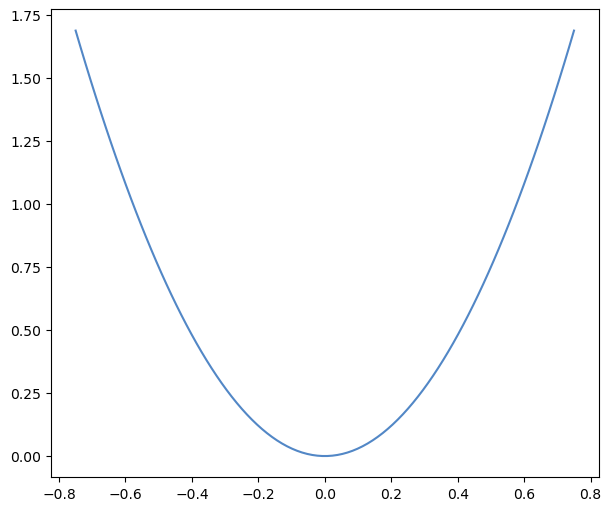

In [10]:
phi_nought = np.linspace(-0.75,0.75,100)

coexistence_lines = np.loadtxt('1D Coexistence Redlines.txt')
coexistence_lines[:,1] = -1*coexistence_lines[:,1]
print(coexistence_lines.size)


fig = plt.figure(layout='constrained', figsize=(6, 5))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
marginal = ax.plot(phi_nought, 3*phi_nought**2, label=r'Marginal Stability', color=colors[0])
coexistence_left = ax.plot(coexistence_lines[:34,0], coexistence_lines[:34,1], label=r'Coexistence Curves', color = colors[3])
coexistence_right = ax.plot(coexistence_lines[34:,0], coexistence_lines[34:,1], color = colors[3])
single_cell = ax.scatter(-0.651, 0.9, label=r'Single Cell', color=colors[2])
coexistence_boundaries = ax.scatter([-0.675, -0.243], [0.9, 0.9], label=r'Coexistence Boundaries', color = colors[1])

plt.ylim(-0.1,1.0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0, labelsize='medium')
ax.legend(loc='lower right')
ax.set_xlabel(r'Avgerage Order Paramter ($\phi_0$)', fontsize='large')
ax.set_ylabel(r'Model Parameter ($\epsilon$)', fontsize='large')

plt.savefig('Phase Diagram.jpg', dpi=1800)
plt.show()

# Pattern Formation by Mode

AttributeError: 'Axes' object has no attribute 'tight_layout'

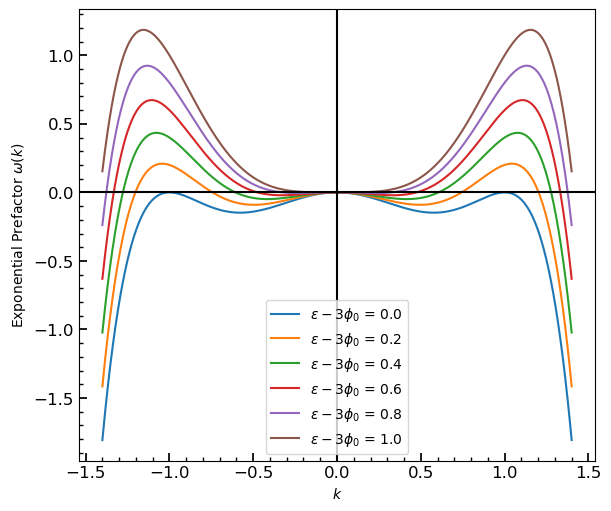

In [21]:
#Here we plot the for, of the growth term
omega = lambda delta,x: (x**2)*(delta-(1-x**2)**2)

delta_values = np.linspace(0.0, 1, 6)
x_values_large = np.linspace(-1.4,1.4,10000)


fig = plt.figure(layout='constrained', figsize=(6, 5))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()

for delta in delta_values:
    y_k = omega(delta, x_values_large)
    ax.plot(x_values_large, y_k, label = r'$\epsilon - 3\phi_0$' + f' = {delta.round(3)}')

    

#plt.xlim([0, 5])
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'Exponential Prefactor $\omega(k)$')
ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0, labelsize='medium')
ax.tight_layout()
plt.savefig('Speed of Pattern Formation.jpg', dpi = 1500)
plt.show()